<a href="https://colab.research.google.com/github/twiese86/Cirq/blob/master/InfoWarfareRussiaNLPv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Information Warfare**
By Thomas L. Wiese III


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb




import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [2]:
url1 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_1.csv'
url2 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_2.csv'
url3 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_3.csv'
url4 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_4.csv'
url5 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_5.csv'
url6 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_6.csv'
url7 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_7.csv'
url8 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_8.csv'
url9 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_9.csv'
url10 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_10.csv'
url11 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_11.csv'
url12 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_12.csv'
url13 = 'https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_13.csv'

#datasource: https://www.tandfonline.com/doi/abs/10.1080/10584609.2020.1718257
#Darren L. Linvill & Patrick L. Warren (2020) Troll Factories: Manufacturing Specialized Disinformation on Twitter, Political Communication, 37:4, 447-467, DOI: 10.1080/10584609.2020.1718257


In [3]:
df1 = pd.read_csv(url1,index_col=0,parse_dates=[0]) #read csv data files
df2 = pd.read_csv(url2,index_col=0,parse_dates=[0])
df3 = pd.read_csv(url3,index_col=0,parse_dates=[0])
df4 = pd.read_csv(url4,index_col=0,parse_dates=[0])
df5 = pd.read_csv(url5,index_col=0,parse_dates=[0])
df6 = pd.read_csv(url6,index_col=0,parse_dates=[0])
df7 = pd.read_csv(url7,index_col=0,parse_dates=[0])
df8 = pd.read_csv(url8,index_col=0,parse_dates=[0])
df9 = pd.read_csv(url9,index_col=0,parse_dates=[0])
df10 = pd.read_csv(url10,index_col=0,parse_dates=[0])
df11 = pd.read_csv(url11,index_col=0,parse_dates=[0])
df12 = pd.read_csv(url12,index_col=0,parse_dates=[0])
df13 = pd.read_csv(url13,index_col=0,parse_dates=[0])

In [4]:
df14 = df1.append(df2)    #append all the datasets into a single dataframe
df15 = df14.append(df3)
df16 = df15.append(df4)
df17 = df16.append(df5)
df18 = df17.append(df6)
df19 = df18.append(df7)
df20 = df19.append(df9)
df21 = df20.append(df10)
df22 = df21.append(df11)
df23 = df22.append(df12)
df24 = df23.append(df13)

In [5]:
df24.info() #review datatypes and column names


<class 'pandas.core.frame.DataFrame'>
Index: 2703249 entries, 906000000000000000 to 3093873665
Data columns (total 20 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   author            object
 1   content           object
 2   region            object
 3   language          object
 4   publish_date      object
 5   harvested_date    object
 6   following         int64 
 7   followers         int64 
 8   updates           int64 
 9   post_type         object
 10  account_type      object
 11  retweet           int64 
 12  account_category  object
 13  new_june_2018     int64 
 14  alt_external_id   object
 15  tweet_id          int64 
 16  article_url       object
 17  tco1_step1        object
 18  tco2_step1        object
 19  tco3_step1        object
dtypes: int64(6), object(14)
memory usage: 433.1+ MB


In [6]:
df24.head() #review a sample fo the data

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
external_author_id,,,,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [7]:
df24.isnull().sum()
# this tells me which columns have null values and how many

author                    0
content                   1
region                 7595
language                  0
publish_date              0
harvested_date            0
following                 0
followers                 0
updates                   0
post_type           1510079
account_type              0
retweet                   0
account_category          0
new_june_2018             0
alt_external_id           0
tweet_id                  0
article_url               0
tco1_step1           770061
tco2_step1          2048810
tco3_step1          2688534
dtype: int64

### **Notes on Null Values from Data Dictionary**


1.   region - A region classification, as determined by Social Studio
2.   post_type	- Indicates if the tweet was a retweet or a quote-tweet
3.   tco#_step1 - tco1_step1	First redirect for the first http(s)://t.co/ link in a tweet, if it exists
tco2_step1	First redirect for the second http(s)://t.co/ link in a tweet, if it exists
tco3_step1	First redirect for the third http(s)://t.co/ link in a tweet, if it exists.





In [8]:
# Now I'm just going to drop things that are obviously usless but don't nessecarily have null values
df24.drop(['account_type','account_category','article_url'], axis=1, inplace=True)

## Exploratory Data Analysis


In [9]:
df24

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018,alt_external_id,tweet_id,tco1_step1,tco2_step1,tco3_step1
external_author_id,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,0,0,905874659358453760,914580356430536707,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,0,0,905874659358453760,914621840496189440,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,1,0,905874659358453760,914623490375979008,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,0,0,905874659358453760,914639143690555392,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,1,0,905874659358453760,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093873665,_YOUR_LIFESTYLE,Санкционный пинг-понг http://t.co/Jz06cndR8q,Unknown,Uzbek,9/7/2015 1:31,9/7/2015 1:31,60,4,412,NaN,0,0,3093873665,640698851108782080,http://podrobnosti.biz/news/4847-sankcionnyy-p...,NaN,NaN
3093873665,_YOUR_LIFESTYLE,Горизонтальный кальян NanoSmoke http://t.co/rL...,Unknown,Russian,9/8/2015 14:49,9/8/2015 14:49,60,4,416,NaN,0,0,3093873665,641262037654372352,http://goo.gl/eP94oU,NaN,NaN
3093873665,_YOUR_LIFESTYLE,Фотограф Kai-Hendrik Schroeder http://t.co/q0x...,Unknown,Russian,9/9/2015 18:52,9/9/2015 18:52,60,4,418,NaN,0,0,3093873665,641685532263608320,http://goo.gl/5dzync,NaN,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

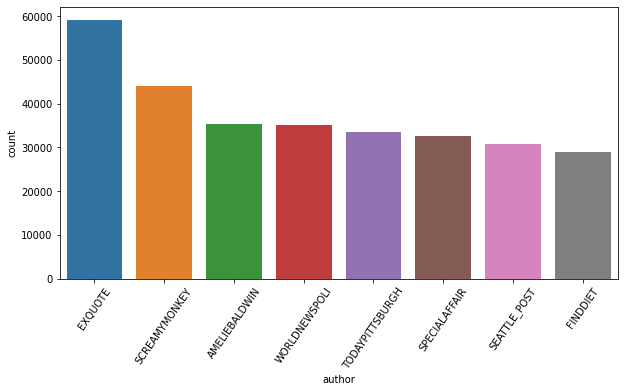

In [10]:
sb.set_context({"figure.figsize": (10, 5)})
plot = sb.countplot(df24['author'], order=df24.author.value_counts().iloc[:8].index)
plt.xticks(rotation=55)

In [11]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
df24

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018,alt_external_id,tweet_id,tco1_step1,tco2_step1,tco3_step1
external_author_id,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,0,0,905874659358453760,914580356430536707,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,0,0,905874659358453760,914621840496189440,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,1,0,905874659358453760,914623490375979008,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,0,0,905874659358453760,914639143690555392,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,1,0,905874659358453760,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093873665,_YOUR_LIFESTYLE,Санкционный пинг-понг http://t.co/Jz06cndR8q,Unknown,Uzbek,9/7/2015 1:31,9/7/2015 1:31,60,4,412,NaN,0,0,3093873665,640698851108782080,http://podrobnosti.biz/news/4847-sankcionnyy-p...,NaN,NaN
3093873665,_YOUR_LIFESTYLE,Горизонтальный кальян NanoSmoke http://t.co/rL...,Unknown,Russian,9/8/2015 14:49,9/8/2015 14:49,60,4,416,NaN,0,0,3093873665,641262037654372352,http://goo.gl/eP94oU,NaN,NaN
3093873665,_YOUR_LIFESTYLE,Фотограф Kai-Hendrik Schroeder http://t.co/q0x...,Unknown,Russian,9/9/2015 18:52,9/9/2015 18:52,60,4,418,NaN,0,0,3093873665,641685532263608320,http://goo.gl/5dzync,NaN,NaN


In [13]:
df24['language'].value_counts()

English                1993142
Russian                 517263
German                   79234
Ukrainian                32932
Italian                  17935
LANGUAGE UNDEFINED        8040
Serbian                   7819
Uzbek                     7784
Bulgarian                 7671
Macedonian                4360
Arabic                    3626
French                    3547
Spanish                   2878
Norwegian                 2118
Farsi (Persian)           1587
Romanian                  1551
Dutch                     1113
Swedish                    955
Vietnamese                 888
Estonian                   738
Japanese                   733
Catalan                    567
Albanian                   546
Finnish                    545
Croatian                   504
Icelandic                  472
Portuguese                 446
Pushto                     433
Turkish                    420
Lithuanian                 399
Polish                     366
Somali                     268
Slovak  

In [14]:
df24[df24["language"].str.contains("English")==True] #drops all non-english tweets

,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018,alt_external_id,tweet_id,tco1_step1,tco2_step1,tco3_step1
external_author_id,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,0,0,905874659358453760,914580356430536707,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,0,0,905874659358453760,914621840496189440,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,1,0,905874659358453760,914623490375979008,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,0,0,905874659358453760,914639143690555392,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,1,0,905874659358453760,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093873665,_YOUR_LIFESTYLE,Like me. Share me. Follow me http://t.co/VvhUO...,Unknown,English,10/8/2015 15:01,10/8/2015 15:01,59,13,458,NaN,0,0,3093873665,652136711925858308,http://goo.gl/E9LTO1,NaN,NaN
3093873665,_YOUR_LIFESTYLE,.the main thing is to was love https://t.co/oq...,Unknown,English,11/4/2015 8:24,11/4/2015 8:25,68,23,518,NaN,0,0,3093873665,661821265926299648,http://vk.cc/4njV0X,NaN,NaN
3093873665,_YOUR_LIFESTYLE,Amazing! Found my script: Download ReBuild - W...,United States,English,6/25/2016 11:27,6/25/2016 11:28,40,40,817,NaN,0,0,3093873665,746666223757332480,https://www.guestpost.xyz/2016/05/23/download-...,NaN,NaN


In [15]:
!pip install tweet-preprocessor
import preprocessor as p
# https://www.kaggle.com/sreejiths0/efficient-tweet-preprocessing

In [16]:
train_df = df24.dropna()
train_df = df24.drop_duplicates()
train_df.rename(columns = {'content' : 'text'}, inplace = True)

In [17]:
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [18]:
train_df['text']=train_df['text'].apply(str)
train_df['text'] = train_df.apply(preprocess_tweet, axis=1) 

#Tweets have been cleaned to normal text.
#Lowercasing
#Punctuation Removal
#Replace extra white spaces
#Stopwords removal
#For stop word removal , i have used gensim library


In [19]:
train_df.head()


,author,text,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018,alt_external_id,tweet_id,tco1_step1,tco2_step1,tco3_step1
external_author_id,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,0,0,905874659358453760,914580356430536707,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,0,0,905874659358453760,914621840496189440,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,1,0,905874659358453760,914623490375979008,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,0,0,905874659358453760,914639143690555392,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
906000000000000000,10_GOP,RESPECTING our National Anthem!,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,1,0,905874659358453760,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [20]:
from gensim.parsing.preprocessing import remove_stopwords


In [21]:
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [22]:
train_df['text'] = train_df.apply(stopword_removal, axis=1) # remove stopwords


In [23]:
train_df.head()

,author,text,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018,alt_external_id,tweet_id,tco1_step1,tco2_step1,tco3_step1
external_author_id,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,"""We sitting Democrat US Senator trial corrupti...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,0,0,905874659358453760,914580356430536707,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
906000000000000000,10_GOP,Marshawn Lynch arrives game anti-Trump shirt. ...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,0,0,905874659358453760,914621840496189440,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
906000000000000000,10_GOP,Daughter fallen Navy Sailor delivers powerful ...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,1,0,905874659358453760,914623490375979008,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,0,0,905874659358453760,914639143690555392,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
906000000000000000,10_GOP,RESPECTING National Anthem!,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,1,0,905874659358453760,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [24]:
train_df['text'] = train_df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [25]:
train_df.head()


,author,text,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018,alt_external_id,tweet_id,tco1_step1,tco2_step1,tco3_step1
external_author_id,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,we sitting democrat us senator trial corrupti...,Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,0,0,905874659358453760,914580356430536707,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
906000000000000000,10_GOP,marshawn lynch arrives game anti trump shirt j...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,0,0,905874659358453760,914621840496189440,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
906000000000000000,10_GOP,daughter fallen navy sailor delivers powerful ...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,1,0,905874659358453760,914623490375979008,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
906000000000000000,10_GOP,just in president trump dedicates presidents c...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,0,0,905874659358453760,914639143690555392,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
906000000000000000,10_GOP,respecting national anthem,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,1,0,905874659358453760,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


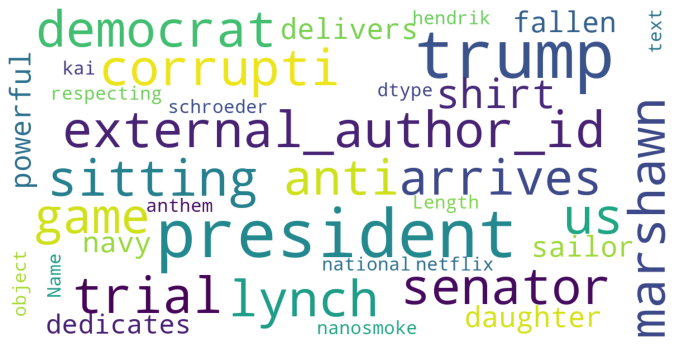

In [26]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train_df['text'])

In [27]:
corpus=[]
new= train_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i] #creates a corpus of twitter words

In [28]:
corpus 

['we',
 'sitting',
 'democrat',
 'us',
 'senator',
 'trial',
 'corruption',
 'you',
 've',
 'barely',
 'heard',
 'peep',
 'mainstream',
 'media',
 'marshawn',
 'lynch',
 'arrives',
 'game',
 'anti',
 'trump',
 'shirt',
 'judging',
 'sagging',
 'pants',
 'shirt',
 'lynch',
 'vs',
 'belt',
 'daughter',
 'fallen',
 'navy',
 'sailor',
 'delivers',
 'powerful',
 'monologue',
 'anthem',
 'protests',
 'burns',
 'nfl',
 'packers',
 'gear',
 'just',
 'in',
 'president',
 'trump',
 'dedicates',
 'presidents',
 'cup',
 'golf',
 'tournament',
 'trophy',
 'people',
 'florida',
 'texas',
 'puerto',
 'rico',
 'respecting',
 'national',
 'anthem',
 'dan',
 'bongino',
 'nobody',
 'trolls',
 'liberals',
 'better',
 'donald',
 'trump',
 'exactly',
 'doesn',
 't',
 'matter',
 'cnn',
 'doesn',
 't',
 'report',
 'crimes',
 'this',
 'won',
 't',
 'change',
 'fact',
 'you',
 're',
 'going',
 'down',
 'as',
 'i',
 'hate',
 'promoting',
 'cnn',
 'article',
 'admitting',
 'everything',
 'trump',
 'said',
 'pr',


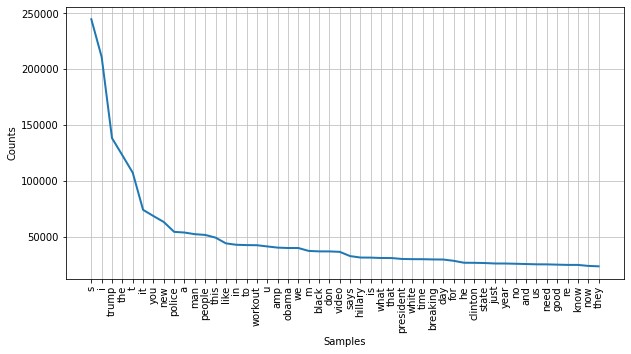

In [29]:
data_analysis = nltk.FreqDist(corpus)
data_analysis.plot(50, cumulative=False) #seems like there are stop words in here

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703249 entries, 906000000000000000 to 3093873665
Data columns (total 17 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   author           object
 1   text             object
 2   region           object
 3   language         object
 4   publish_date     object
 5   harvested_date   object
 6   following        int64 
 7   followers        int64 
 8   updates          int64 
 9   post_type        object
 10  retweet          int64 
 11  new_june_2018    int64 
 12  alt_external_id  object
 13  tweet_id         int64 
 14  tco1_step1       object
 15  tco2_step1       object
 16  tco3_step1       object
dtypes: int64(6), object(11)
memory usage: 371.2+ MB


In [31]:
from nltk.corpus import stopwords

In [32]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
filtered_corpus =[]
for w in corpus:
  if w not in stop_words:
    filtered_corpus.append(w)

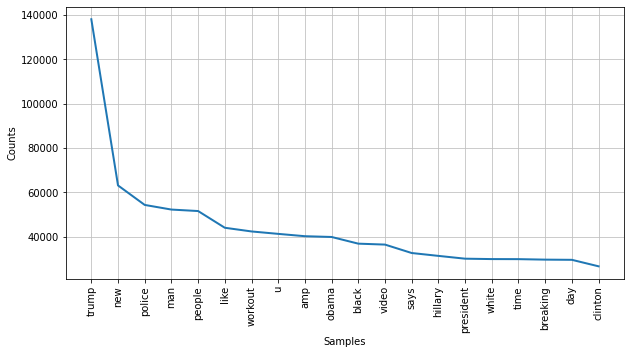

In [34]:
plt.figure(figsize=(10,5))
data_analysis = nltk.FreqDist(filtered_corpus)
data_analysis.plot(20,cumulative=False) #seems like there are stop words in here

In [35]:
# this looks better to me, fewer words that seem like stop words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
res = ' '.join(map(str, filtered_corpus))
wordcloud = WordCloud().generate(res)
#interestingly, the third most common word is police

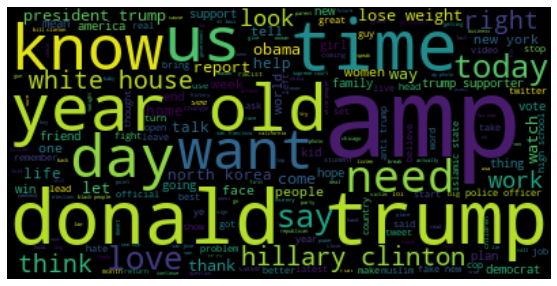

In [36]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

#people tend to believe what their social network is telling them is true, "friend", and "believe" standout here, mention research into villages and birthcontrol from viral spread of info book

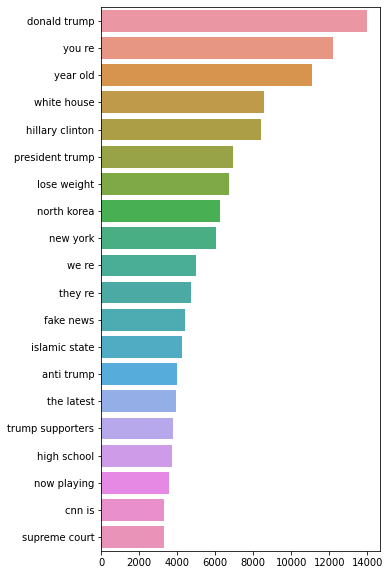

In [38]:
import collections
def get_top_ngram(corp, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corp)
    bag_of_words = vec.transform(corp)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]
sb.set_context({"figure.figsize": (5, 10)})
top_n_bigrams=get_top_ngram(train_df['text'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sb.barplot(x=y,y=x,)    #bigram

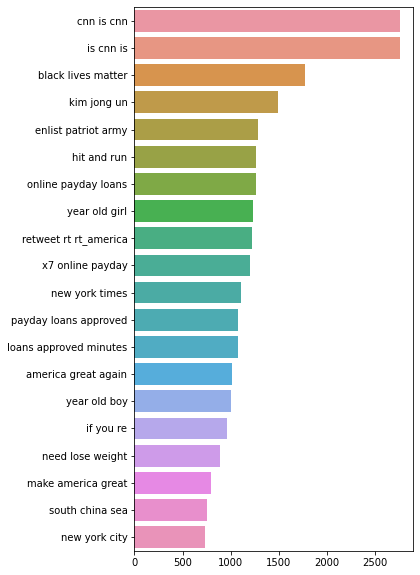

In [39]:
#trigram
top_tri_grams=get_top_ngram(train_df['text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sb.barplot(x=y,y=x)

In [40]:
#https://paperswithcode.com/dataset/liar
#starting the ML, reading in and analyzing the LIAR dataset
! pip install fsspec
liarurl= 'https://raw.githubusercontent.com/ekagra-ranjan/fake-news-detection-LIAR-pytorch/master/train.tsv'
df_liar = pd.read_csv(liarurl, sep='\t', error_bad_lines=False, names=["jsonid", "rating", "text", "metatag", 'person', 'personcat','state', 'party', '1', '2', '3', '4', '5', 'source'], index_col=0)

     |████████████████████████████████| 112kB 6.3MB/s 


In [41]:
df_liar.head()
#LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION

#William Yang Wang, "Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.
#=====================================================================
#Description of the TSV format:

#Column 1: the ID of the statement ([ID].json).
#Column 2: the label.
#Column 3: the statement.
#Column 4: the subject(s).
#Column 5: the speaker.
#Column 6: the speaker's job title.
#Column 7: the state info.
#Column 8: the party affiliation.
#Column 9-13: the total credit history count, including the current statement.
#9: barely true counts.
#10: false counts.
#11: half true counts.
#12: mostly true counts.
#13: pants on fire counts.
#Column 14: the context (venue / location of the speech or statement).

#Note that we do not provide the full-text verdict report in this current version of the dataset,
#but you can use the following command to access the full verdict report and links to the source documents:
#wget http://www.politifact.com//api/v/2/statement/[ID]/?format=json

#======================================================================
#The original sources retain the copyright of the data.

#Note that there are absolutely no guarantees with this data,
#and we provide this dataset "as is",
#but you are welcome to report the issues of the preliminary version
#of this data.

#You are allowed to use this dataset for research purposes only.

#For more question about the dataset, please contact:
#William Wang, william@cs.ucsb.edu

#v1.0 04/23/2017



,rating,text,metatag,person,personcat,state,party,1,2,3,4,5,source
jsonid,,,,,,,,,,,,,
2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [42]:
# i dont know what columns 1-5 actually represent, need to figure that our
df_rsntwts = train_df

In [43]:
df_liar['rating'].value_counts()

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: rating, dtype: int64

In [44]:
df_liar.head()

,rating,text,metatag,person,personcat,state,party,1,2,3,4,5,source
jsonid,,,,,,,,,,,,,
2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [45]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_liar['ratingnum'] = lb_make.fit_transform(df_liar['rating'])


In [46]:
df_liar['text'] = df_liar.apply(stopword_removal, axis=1) # remove stopwords
#train_df['text']=train_df['text'].apply(str)
df_liar['text'] = df_liar.apply(preprocess_tweet, axis=1) 
#make corpus of liar text

In [47]:
df_liar.head()

,rating,text,metatag,person,personcat,state,party,1,2,3,4,5,source,ratingnum
jsonid,,,,,,,,,,,,,,
2635.json,false,Says Annies List political group supports thir...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1
10540.json,half-true,When decline coal start? It started natural ga...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,2
324.json,mostly-true,"Hillary Clinton agrees John McCain ""by voting ...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,3
1123.json,false,Health care reform legislation likely mandate ...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1
9028.json,half-true,The economic turnaround started end term.,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,2


In [48]:
import string


In [49]:
df_liar["text_clean"] = df_liar['text'].str.replace('[^\w\s]','')

In [50]:
df_liar.head()

,rating,text,metatag,person,personcat,state,party,1,2,3,4,5,source,ratingnum,text_clean
jsonid,,,,,,,,,,,,,,,
2635.json,false,Says Annies List political group supports thir...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,Says Annies List political group supports thir...
10540.json,half-true,When decline coal start? It started natural ga...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,2,When decline coal start It started natural gas...
324.json,mostly-true,"Hillary Clinton agrees John McCain ""by voting ...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,3,Hillary Clinton agrees John McCain by voting G...
1123.json,false,Health care reform legislation likely mandate ...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,Health care reform legislation likely mandate ...
9028.json,half-true,The economic turnaround started end term.,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,2,The economic turnaround started end term


In [51]:
df_liar["text_clean"] = df_liar["text_clean"].str.lower()
df_liar.head()


,rating,text,metatag,person,personcat,state,party,1,2,3,4,5,source,ratingnum,text_clean
jsonid,,,,,,,,,,,,,,,
2635.json,false,Says Annies List political group supports thir...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,says annies list political group supports thir...
10540.json,half-true,When decline coal start? It started natural ga...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,2,when decline coal start it started natural gas...
324.json,mostly-true,"Hillary Clinton agrees John McCain ""by voting ...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,3,hillary clinton agrees john mccain by voting g...
1123.json,false,Health care reform legislation likely mandate ...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,health care reform legislation likely mandate ...
9028.json,half-true,The economic turnaround started end term.,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,2,the economic turnaround started end term


In [52]:
from sklearn.model_selection import train_test_split
X = df_liar['text_clean']
y = df_liar['ratingnum']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_final = vectorizer.fit_transform(X_train)

In [54]:
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf', LinearSVC()),
                    ])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [55]:
predictions = text_clf.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.22037760416666666
[[ 88 109 108  95  28  54]
 [ 73 162 132 108  42  86]
 [118 120 157 148  29 103]
 [ 87 110 138 134  15  98]
 [ 45  47  41  35  38  30]
 [ 73  77 120 104  22  98]]
              precision    recall  f1-score   support

           0       0.18      0.18      0.18       482
           1       0.26      0.27      0.26       603
           2       0.23      0.23      0.23       675
           3       0.21      0.23      0.22       582
           4       0.22      0.16      0.19       236
           5       0.21      0.20      0.20       494

    accuracy                           0.22      3072
   macro avg       0.22      0.21      0.21      3072
weighted avg       0.22      0.22      0.22      3072



In [57]:
# make everything < mostly true = false

In [58]:
df_liar['ratingnum'].value_counts()

2    2114
1    1995
3    1962
5    1676
0    1654
4     839
Name: ratingnum, dtype: int64

In [59]:
df_liar['rating'].value_counts()

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: rating, dtype: int64

In [60]:
df_liar['ratingnum'].mask(df_liar['ratingnum'] == 3, 5, inplace=True) # change mostly-true to true


In [61]:
df_liar['ratingnum'].mask(df_liar['ratingnum'] == 2, 1, inplace=True)
df_liar['ratingnum'].mask(df_liar['ratingnum'] == 4, 1, inplace=True)
df_liar['ratingnum'].mask(df_liar['ratingnum'] == 0, 1, inplace=True) #change anything <mostly-true to false
# key: 5 = true, 1 = false

In [62]:
df_liar.head()

,rating,text,metatag,person,personcat,state,party,1,2,3,4,5,source,ratingnum,text_clean
jsonid,,,,,,,,,,,,,,,
2635.json,false,Says Annies List political group supports thir...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,1,says annies list political group supports thir...
10540.json,half-true,When decline coal start? It started natural ga...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,when decline coal start it started natural gas...
324.json,mostly-true,"Hillary Clinton agrees John McCain ""by voting ...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,5,hillary clinton agrees john mccain by voting g...
1123.json,false,Health care reform legislation likely mandate ...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,1,health care reform legislation likely mandate ...
9028.json,half-true,The economic turnaround started end term.,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,the economic turnaround started end term


In [63]:
df_liar['ratingnum'].value_counts()

1    6602
5    3638
Name: ratingnum, dtype: int64

In [64]:
X = df_liar['text_clean']
y = df_liar['ratingnum']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [65]:
vectorizer = TfidfVectorizer()
X_train_final = vectorizer.fit_transform(X_train)

In [66]:
#LinearSVC_classifier = SklearnClassifier(SVC(kernel='linear',probability=True)), LinearSVC()
from nltk.classify.scikitlearn import SklearnClassifier
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf', LinearSVC()),
                    ])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [67]:
predictions = text_clf.predict(X_test)

In [68]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6123046875
[[1514  482]
 [ 709  367]]
              precision    recall  f1-score   support

           1       0.68      0.76      0.72      1996
           5       0.43      0.34      0.38      1076

    accuracy                           0.61      3072
   macro avg       0.56      0.55      0.55      3072
weighted avg       0.59      0.61      0.60      3072



In [69]:
#prediction is 61% accurate for detecting truth vs lie within LIAR dataset
#https://medium.com/@hritikattri10/feature-extraction-using-tf-idf-algorithm-44eedb37305e

In [70]:
df_rsntwts.head()

,author,text,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018,alt_external_id,tweet_id,tco1_step1,tco2_step1,tco3_step1
external_author_id,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,we sitting democrat us senator trial corrupti...,Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,0,0,905874659358453760,914580356430536707,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
906000000000000000,10_GOP,marshawn lynch arrives game anti trump shirt j...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,0,0,905874659358453760,914621840496189440,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
906000000000000000,10_GOP,daughter fallen navy sailor delivers powerful ...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,1,0,905874659358453760,914623490375979008,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
906000000000000000,10_GOP,just in president trump dedicates presidents c...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,0,0,905874659358453760,914639143690555392,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
906000000000000000,10_GOP,respecting national anthem,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,1,0,905874659358453760,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [71]:
df_rsntwts['ratingnum'] = 1

In [72]:
df_rsntwts.head()

,author,text,region,language,publish_date,harvested_date,following,followers,updates,post_type,retweet,new_june_2018,alt_external_id,tweet_id,tco1_step1,tco2_step1,tco3_step1,ratingnum
external_author_id,,,,,,,,,,,,,,,,,,
906000000000000000,10_GOP,we sitting democrat us senator trial corrupti...,Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,0,0,905874659358453760,914580356430536707,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,1
906000000000000000,10_GOP,marshawn lynch arrives game anti trump shirt j...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,0,0,905874659358453760,914621840496189440,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,1
906000000000000000,10_GOP,daughter fallen navy sailor delivers powerful ...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,1,0,905874659358453760,914623490375979008,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,1
906000000000000000,10_GOP,just in president trump dedicates presidents c...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,0,0,905874659358453760,914639143690555392,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,1
906000000000000000,10_GOP,respecting national anthem,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,1,0,905874659358453760,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,1


In [73]:
X1 = df_rsntwts['text']
Y1 = df_rsntwts['ratingnum']

In [74]:
predictions = text_clf.predict(X1)

In [75]:
print(accuracy_score(Y1, predictions))
print(confusion_matrix(Y1, predictions))
print(classification_report(Y1, predictions))#predict if IRA tweets are false using the LIAR dataset assuming all IRA tweets are 'false'

0.7997032459828894
[[2161797  541452]
 [      0       0]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89   2703249
           5       0.00      0.00      0.00         0

    accuracy                           0.80   2703249
   macro avg       0.50      0.40      0.44   2703249
weighted avg       1.00      0.80      0.89   2703249



In [76]:
! pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()

text_xgb = Pipeline([('tfidf', TfidfVectorizer()),
                      ('xgb', model),
                    ])
text_xgb.fit(X_train, y_train)
predictions = text_xgb.predict(X1)


In [77]:
print(accuracy_score(Y1, predictions))
print(confusion_matrix(Y1, predictions))
print(classification_report(Y1, predictions))#predict if IRA tweets are false using the LIAR dataset assuming all IRA tweets are 'false'

0.9973136030014254
[[2695987    7262]
 [      0       0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00   2703249
           5       0.00      0.00      0.00         0

    accuracy                           1.00   2703249
   macro avg       0.50      0.50      0.50   2703249
weighted avg       1.00      1.00      1.00   2703249



In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

text_knn = Pipeline([('tfidf', TfidfVectorizer()),
                      ('knn', model),
                    ])
text_knn.fit(X_train, y_train)
predictions = text_knn.predict(X1)
print(accuracy_score(Y1, predictions))
print(confusion_matrix(Y1, predictions))
print(classification_report(Y1, predictions))#predict if IRA tweets are false using the LIAR dataset assuming all IRA tweets are 'false'

0.8066870643436842
[[2180676  522573]
 [      0       0]]
              precision    recall  f1-score   support

           1       1.00      0.81      0.89   2703249
           5       0.00      0.00      0.00         0

    accuracy                           0.81   2703249
   macro avg       0.50      0.40      0.45   2703249
weighted avg       1.00      0.81      0.89   2703249



In [79]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

text_rf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('rf', model),
                    ], verbose=True)
text_rf.fit(X_train, y_train)
predictions = text_rf.predict(X1)
print(accuracy_score(Y1, predictions))
print(confusion_matrix(Y1, predictions))
print(classification_report(Y1, predictions))#predict if IRA tweets are false using the LIAR dataset assuming all IRA tweets are 'false'

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   6.6s
0.95479957636163
[[2581061  122188]
 [      0       0]]
              precision    recall  f1-score   support

           1       1.00      0.95      0.98   2703249
           5       0.00      0.00      0.00         0

    accuracy                           0.95   2703249
   macro avg       0.50      0.48      0.49   2703249
weighted avg       1.00      0.95      0.98   2703249



In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

text_nb = Pipeline([('tfidf', TfidfVectorizer()),
                      ('nb', model),
                    ], verbose=True)
text_nb.fit(X_train, y_train)
predictions = text_nb.predict(X1)
print(accuracy_score(Y1, predictions))
print(confusion_matrix(Y1, predictions))
print(classification_report(Y1, predictions))#predict if IRA tweets are false using the LIAR dataset assuming all IRA tweets are 'false'

In [81]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_rsntwts['scores'] = df_rsntwts['text'].apply(lambda text: sid.polarity_scores(text))
df = df_rsntwts


In [83]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df['compound']

external_author_id
906000000000000000    0.0000
906000000000000000   -0.3182
906000000000000000   -0.1531
906000000000000000    0.0000
906000000000000000    0.4939
                       ...  
3093873665            0.0000
3093873665            0.0000
3093873665            0.0000
3093873665            0.0000
3093873665            0.0000
Name: compound, Length: 2703249, dtype: float64

In [ ]:
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [ ]:
df.sentiment_type.value_counts(normalize=True).plot(kind='bar',title="Sentiment Analysis of IRA Tweets")


In [86]:
df_liar['scores'] = df_liar['text'].apply(lambda text: sid.polarity_scores(text))
df = df_liar


In [87]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df['compound']

jsonid
2635.json     0.2500
10540.json    0.3612
324.json      0.3182
1123.json     0.7579
9028.json     0.0000
               ...  
5473.json    -0.7506
3408.json     0.4019
3959.json     0.5859
2253.json     0.0000
1155.json     0.6124
Name: compound, Length: 10240, dtype: float64

In [88]:
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

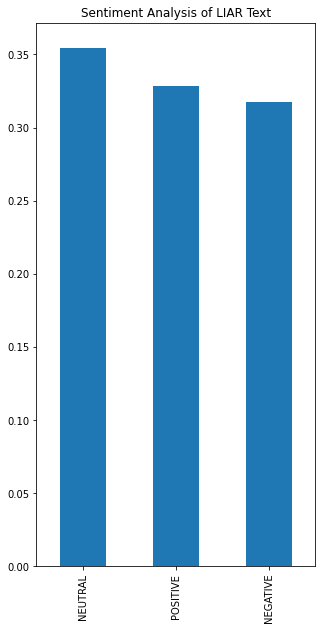

In [89]:
df.sentiment_type.value_counts(normalize=True).plot(kind='bar',title="Sentiment Analysis of LIAR Text")


In [90]:
df = df.loc[df['ratingnum'] == 5]
df

,rating,text,metatag,person,personcat,state,party,1,2,3,4,5,source,ratingnum,text_clean,scores,compound,sentiment_type
jsonid,,,,,,,,,,,,,,,,,,
324.json,mostly-true,"Hillary Clinton agrees John McCain ""by voting ...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,5,hillary clinton agrees john mccain by voting g...,"{'neg': 0.153, 'neu': 0.552, 'pos': 0.294, 'co...",0.3182,POSITIVE
12465.json,true,The Chicago Bears starting quarterbacks years ...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,5,the chicago bears starting quarterbacks years ...,"{'neg': 0.226, 'neu': 0.692, 'pos': 0.082, 'co...",-0.5106,NEGATIVE
9741.json,mostly-true,Says GOP primary opponents Glenn Grothman Joe ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,5,says gop primary opponents glenn grothman joe ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
7115.json,mostly-true,"For time history, share national popular vote ...",elections,robert-menendez,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech,5,for time history share national popular vote m...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.6124,POSITIVE
8616.json,mostly-true,The economy bled $24 billion government shutdown.,"economy,federal-budget,health-care",doonesbury,NaN,NaN,none,0.0,0.0,2.0,4.0,0.0,a Doonesbury strip in the Sunday comics,5,the economy bled 24 billion government shutdown,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744.json,mostly-true,Says Rick Perry turned invitation meet Preside...,"bipartisanship,immigration",jay-carney,White House press secretary,District of Columbia,none,2.0,2.0,1.0,2.0,0.0,a press gaggle aboard Air Force One.,5,says rick perry turned invitation meet preside...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
4614.json,mostly-true,The proudest accomplishment (of tenure) leavin...,"state-budget,state-finances,taxes",christine-whitman,"President, The Whitman Strategy Group",New Jersey,republican,0.0,0.0,0.0,2.0,0.0,an interview on NJTV,5,the proudest accomplishment of tenure leaving ...,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.5574,POSITIVE
4423.json,mostly-true,"Mike Trainor...still owes $250,000 state.","bankruptcy,economy,legal-issues",vincent-buddy-cianci,NaN,Rhode Island,independent,0.0,2.0,1.0,2.0,1.0,a talk show discussion,5,mike trainorstill owes 250000 state,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


In [91]:
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

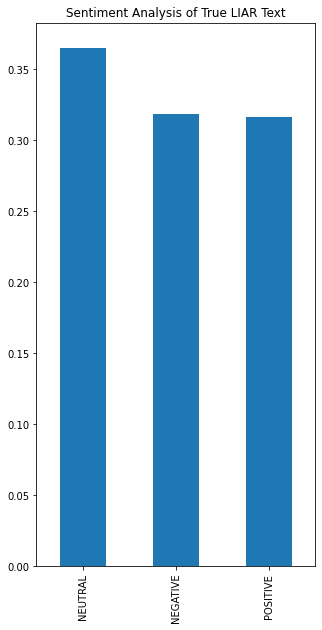

In [92]:
df.sentiment_type.value_counts(normalize=True).plot(kind='bar',title="Sentiment Analysis of True LIAR Text")


In [93]:
df['ratingnum'].value_counts()

5    3638
Name: ratingnum, dtype: int64

In [94]:
import tweepy


In [95]:
consumer_key = 'cJSMBI4xpLjIEcW3RN8qlh9pA'
consumer_secret = 'LZdV90425XjXsFPjLlSO0yN8FWIupD5vaNyUHUY98JVb7rvXUm'
access_key= '1399862836302602240-DiFBGSKigGinhJS98R2wasTySCpwdF'
access_secret = 'wLmR3BvMfTOTe5gmvr369SOyA0N5D59Y2PNaRCazg4RjF'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAGsEQQEAAAAAYR2NNUx%2BKkBujAt7Ng1MpbIrWvQ%3DHRh5jyLblDC5T2mUJI4mO9oSNIMID46qQzYm576zDOMUvfhLWf'

In [96]:
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  
# set access to user's access key and access secret 
auth.set_access_token(access_key, access_secret)
  
# calling the api 
api = tweepy.API(auth)

In [97]:
# We import our access keys:


# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [98]:
# We create an extractor object:
extractor = twitter_setup()

# Only iterate through the first 3 pages
for page in tweepy.Cursor(api.user_timeline).pages(3):
    process_page(page)
# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="AP", count=3000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Germany has denied Russian airlines permission to use its airspace after Moscow failed to approve a Lufthansa fligh… https://t.co/ZruLbJzxkS

Britain says 75% of U.K.'s adult population has received at least one dose of coronavirus vaccine and nearly 50% ar… https://t.co/0UVCgSby5s

Scientists have found clues that the world’s leading COVID-19 vaccines offer lasting protection that could diminish… https://t.co/coT56Okgz4

The largest warship in the Iranian navy caught fire and later sank in the Gulf of Oman under unclear circumstances,… https://t.co/9UNGrzMnO0

RT @AP_Sports: BREAKING: Medina Spirit's positive drug test confirmed, Kentucky Derby win in jeopardy and potential discipline looms for Ha…



In [99]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Germany has denied Russian airlines permission...
1,Britain says 75% of U.K.'s adult population ha...
2,Scientists have found clues that the world’s l...
3,The largest warship in the Iranian navy caught...
4,RT @AP_Sports: BREAKING: Medina Spirit's posit...
5,The former CEO of Make-A-Wish Iowa has pleaded...
6,The Proud Boys and the Oath Keepers are reelin...
7,RT @APEntertainment: .@AnthonyMackie says the ...
8,Salvage experts have failed to tow a fire-stri...
9,"RT @APEntertainment: ON THIS DAY - In 2013, @M..."


In [100]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [101]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Germany has denied Russian airlines permission...,140,1400142935585443840,2021-06-02 17:31:03,SocialFlow,288,110
1,Britain says 75% of U.K.'s adult population ha...,140,1400135471683022851,2021-06-02 17:01:24,SocialFlow,152,40
2,Scientists have found clues that the world’s l...,140,1400127852629090309,2021-06-02 16:31:07,SocialFlow,274,92
3,The largest warship in the Iranian navy caught...,140,1400120295739035649,2021-06-02 16:01:06,SocialFlow,125,54
4,RT @AP_Sports: BREAKING: Medina Spirit's posit...,140,1400119370030981128,2021-06-02 15:57:25,SocialFlow,0,51
5,The former CEO of Make-A-Wish Iowa has pleaded...,140,1400112983984984075,2021-06-02 15:32:02,SocialFlow,543,290
6,The Proud Boys and the Oath Keepers are reelin...,140,1400104951951638529,2021-06-02 15:00:07,SocialFlow,424,172
7,RT @APEntertainment: .@AnthonyMackie says the ...,139,1400102929579794433,2021-06-02 14:52:05,SocialFlow,0,6
8,Salvage experts have failed to tow a fire-stri...,139,1400097640226988038,2021-06-02 14:31:04,SocialFlow,133,76
9,"RT @APEntertainment: ON THIS DAY - In 2013, @M...",140,1400083854539608066,2021-06-02 13:36:17,SocialFlow,0,14


In [102]:
df_AP = data

In [103]:
tweets = extractor.user_timeline(screen_name="Reuters", count=3000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

From @Breakingviews: The U.S. Securities and Exchange Commission is giving proxy advisers a nod, writes @TheRealLSL https://t.co/rUoCcnbWzC

SAP launches business network to help with supply chains https://t.co/cjWUcKywNM https://t.co/xptWHdbGyL

While traders were flocking to GameStop earlier this year, the stock also captured the imagination of U.S. teenager… https://t.co/BqBlGJW6l3

Danish PM sees no damage in relationship to allies after U.S. spy case https://t.co/uq2icY672X https://t.co/Dg3TbWOv8a

Hong Kong’s June 4th Museum, dedicated to commemorating the victims of China's Tiananmen Square crackdown in 1989,… https://t.co/uY4DconoMM



In [104]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,From @Breakingviews: The U.S. Securities and E...
1,SAP launches business network to help with sup...
2,While traders were flocking to GameStop earlie...
3,Danish PM sees no damage in relationship to al...
4,"Hong Kong’s June 4th Museum, dedicated to comm..."
5,Kremlin critic Alexei Navalny loses bid to end...
6,From @Reuterspictures: Cubans are increasingly...
7,LIVE: Officials speak on tomorrow's SpaceX res...
8,"Mexico president poised for election win, fire..."
9,A dizzying sky pool has opened up in London su...


In [105]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [106]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,From @Breakingviews: The U.S. Securities and E...,139,1400146594062868485,2021-06-02 17:45:36,SocialFlow,9,4
1,SAP launches business network to help with sup...,104,1400146499137310723,2021-06-02 17:45:13,True Anthem,9,2
2,While traders were flocking to GameStop earlie...,140,1400146443445309445,2021-06-02 17:45:00,Twitter Media Studio,13,3
3,Danish PM sees no damage in relationship to al...,118,1400145230314287106,2021-06-02 17:40:11,True Anthem,27,8
4,"Hong Kong’s June 4th Museum, dedicated to comm...",139,1400145185477042179,2021-06-02 17:40:00,Twitter Media Studio,39,25
5,Kremlin critic Alexei Navalny loses bid to end...,122,1400143983960023044,2021-06-02 17:35:13,True Anthem,58,27
6,From @Reuterspictures: Cubans are increasingly...,140,1400143927416655875,2021-06-02 17:35:00,Twitter Media Studio,47,8
7,LIVE: Officials speak on tomorrow's SpaceX res...,94,1400143731701862400,2021-06-02 17:34:13,Periscope,42,22
8,"Mexico president poised for election win, fire...",119,1400142714402971650,2021-06-02 17:30:11,True Anthem,25,12
9,A dizzying sky pool has opened up in London su...,109,1400142670102679554,2021-06-02 17:30:00,Twitter Media Studio,98,36


In [107]:
df_Rueters = data

In [108]:
df_Rueters.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,From @Breakingviews: The U.S. Securities and E...,139,1400146594062868485,2021-06-02 17:45:36,SocialFlow,9,4
1,SAP launches business network to help with sup...,104,1400146499137310723,2021-06-02 17:45:13,True Anthem,9,2
2,While traders were flocking to GameStop earlie...,140,1400146443445309445,2021-06-02 17:45:00,Twitter Media Studio,13,3
3,Danish PM sees no damage in relationship to al...,118,1400145230314287106,2021-06-02 17:40:11,True Anthem,27,8
4,"Hong Kong’s June 4th Museum, dedicated to comm...",139,1400145185477042179,2021-06-02 17:40:00,Twitter Media Studio,39,25


In [109]:
tweets = extractor.user_timeline(screen_name="USATODAY", count=3000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:


# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:

# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

df_USATODAY = data

df_USATODAY.head()

Number of tweets extracted: 200.



,Tweets,len,ID,Date,Source,Likes,RTs
0,Billie Eilish's recent image change is partly ...,140,1400144178470871040,2021-06-02 17:36:00,SocialNewsDesk,22,4
1,As Brood X cicadas continue to emerge in the U...,125,1400137887367172101,2021-06-02 17:11:00,Twitter Media Studio,27,17
2,The International Space Station's robotic arm ...,140,1400137635524268035,2021-06-02 17:10:00,Twitter Media Studio,19,5
3,The San Francisco Giants will support #PrideMo...,140,1400135120779153412,2021-06-02 17:00:00,SocialNewsDesk,19,3
4,RT @PDavidsonusat: Have you started your own b...,138,1400133609818836997,2021-06-02 16:54:00,Twitter Web App,0,6


In [110]:
tweets = extractor.user_timeline(screen_name="WSJ", count=3000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:


# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:

# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

df_WSJ = data

df_WSJ.head()

Number of tweets extracted: 200.



,Tweets,len,ID,Date,Source,Likes,RTs
0,Only about 20% of bachelor’s degrees in comput...,124,1400146458406535174,2021-06-02 17:45:03,SocialFlow,12,6
1,The humble face mask has proved to be a lifesa...,140,1400143397906702340,2021-06-02 17:32:54,SocialFlow,46,16
2,"The Persian Gulf island nation of Bahrain, bat...",140,1400138918348087296,2021-06-02 17:15:06,SocialFlow,61,36
3,"From @WSJopinion: In this week’s Future View, ...",140,1400135473549524993,2021-06-02 17:01:24,SocialFlow,21,5
4,New York City’s mayoral primary will be the la...,140,1400131383977197568,2021-06-02 16:45:09,SocialFlow,39,8


In [111]:
tweets = extractor.user_timeline(screen_name="BBCNews", count=3000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:


# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:

# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

df_BBC = data

df_BBC.head()

Number of tweets extracted: 200.



,Tweets,len,ID,Date,Source,Likes,RTs
0,School catch-up tsar resigns over lack of fund...,73,1400142967546040322,2021-06-02 17:31:11,SocialFlow,62,29
1,"75% of UK adults have had first Covid vaccine,...",124,1400137404267311111,2021-06-02 17:09:05,SocialFlow,241,52
2,RT @BBCPolitics: Lack of queue jumping helped ...,102,1400136464797679624,2021-06-02 17:05:21,TweetDeck,0,10
3,Teenager fatally stabbed in Birmingham named a...,85,1400134889731760144,2021-06-02 16:59:05,SocialFlow,53,27
4,Police order parents to clean up after teen pa...,73,1400134662056517637,2021-06-02 16:58:11,SocialFlow,175,18


In [112]:
dfaprut = df_AP.append(df_Rueters)    #append all the datasets into a single dataframe
dfaru = dfaprut.append(df_USATODAY)
dfaruw = dfaru.append(df_WSJ)
df_truth = dfaruw.append(df_BBC)
df_truth.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,Germany has denied Russian airlines permission...,140,1400142935585443840,2021-06-02 17:31:03,SocialFlow,288,110
1,Britain says 75% of U.K.'s adult population ha...,140,1400135471683022851,2021-06-02 17:01:24,SocialFlow,152,40
2,Scientists have found clues that the world’s l...,140,1400127852629090309,2021-06-02 16:31:07,SocialFlow,274,92
3,The largest warship in the Iranian navy caught...,140,1400120295739035649,2021-06-02 16:01:06,SocialFlow,125,54
4,RT @AP_Sports: BREAKING: Medina Spirit's posit...,140,1400119370030981128,2021-06-02 15:57:25,SocialFlow,0,51


In [113]:
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Tweets  1000 non-null   object        
 1   len     1000 non-null   int64         
 2   ID      1000 non-null   int64         
 3   Date    1000 non-null   datetime64[ns]
 4   Source  1000 non-null   object        
 5   Likes   1000 non-null   int64         
 6   RTs     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
!pip install searchtweets
from searchtweets import load_credentials
import os
os.environ["SEARCHTWEETS_USERNAME"] = "<ENV_USERNAME>"
os.environ["SEARCHTWEETS_PASSWORD"] = "<ENV_PW>"
os.environ["SEARCHTWEETS_ENDPOINT"] = "<https://api.twitter.com/1.1/tweets/search/fullarchive/searchTweets2.json>"

load_credentials(filename="nothing_here.yaml", yaml_key="no_key_here")